<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/UAS_ML_Milda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project UAS Pembelajaran Mesin

* Nama : Siti Milda Alkan Dawasoka
*   Kelas : TE6A
*   Mata Kuliah : Pembelajaran Mesin






# Studi Kasus :
                                                      

*  Metode : Random Forest
*  Dataset : Air Quality

                         

#Tujuan

Random Forest adalah sebuah algoritma machine learning yang digunakan untuk tugas klasifikasi, regresi, dan pemilihan fitur. Algoritma ini merupakan bagian dari keluarga algoritma ensemble learning, yang menggabungkan prediksi dari beberapa model untuk meningkatkan performa dan ketahanan terhadap overfitting.

Random Forest bekerja dengan cara membangun sejumlah besar pohon keputusan selama pelatihan. Setiap pohon ini dibangun secara acak dengan menggunakan subset acak dari data pelatihan dan subset acak dari fitur pada setiap langkah pemilihan fitur. Proses ini menghasilkan berbagai variasi model, dan hasil prediksi dari masing-masing pohon dijumlahkan atau diambil rata-rata untuk mendapatkan prediksi akhir.

In [187]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [188]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset.data
y = dataset.target

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [190]:
#Only K-NN Classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8055555555555556

In [191]:
#Bagging  over our KNN Classifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True)
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.7777777777777778

#Now Implement RandomForest

#Import Library

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [193]:
import warnings
warnings.filterwarnings('ignore')

Penjelasan :
- numpy, pandas: untuk manipulasi data.
- matplotlib.pyplot, seaborn: visualisasi data.
- warnings.filterwarnings('ignore'): menonaktifkan peringatan untuk menjaga output tetap bersih.

#Importing The Dataset

In [194]:
# Load the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('Dubai_Air_Quality.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

Penjelasan:
- Membaca file CSV berisi data kualitas udara Dubai.
- X: Fitur dipilih dari kolom ke-2 dan ke-3 (indeks 2 dan 3: biasanya CO2, NO2).
- y: Label/target diambil dari kolom terakhir (AQI).

#Exploratory Data Analysis

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('Dubai_Air_Quality.csv')

- Deskripsi Dataset

In [196]:
# preview the dataset

df.head()

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,232.0,NaN,12.4,6.8,82.0,23.9,60.3,68.358340
1,2024-01-01 01:00:00+00:00,244.0,NaN,15.3,7.5,79.0,22.3,57.4,67.695000
2,2024-01-01 02:00:00+00:00,261.0,NaN,19.3,8.6,75.0,22.7,55.8,66.945000
3,2024-01-01 03:00:00+00:00,283.0,NaN,22.9,10.1,72.0,25.3,58.6,66.168335
4,2024-01-01 04:00:00+00:00,317.0,NaN,25.9,12.7,71.0,29.6,64.5,65.356670


Penjelasan:
Untuk menampilkan dataset.

In [197]:
df.shape

(8784, 9)

Penjelasan: Menampilkan jumlah baris dan kolom.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8784 non-null   object 
 1   CO      8784 non-null   float64
 2   CO2     1608 non-null   float64
 3   NO2     8784 non-null   float64
 4   SO2     8784 non-null   float64
 5   O3      8784 non-null   float64
 6   PM2.5   8784 non-null   float64
 7   PM10    8784 non-null   float64
 8   AQI     8784 non-null   float64
dtypes: float64(8), object(1)
memory usage: 617.8+ KB


Penjelasan: Menampilkan  Informasi struktur kolom, tipe data, dan null.

In [199]:
df.isnull().sum()

,0
Date,0
CO,0
CO2,7176
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
AQI,0


Penjelasan: Melihat jumlah nilai kosong (NaN) per kolom.

#Lakukan data understanding dan data visualization

#Handling categorical missing values

In [200]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

Penjelasan:
- Menangani kolom bertipe object (seperti tanggal).
- Mengisi nilai kosong dengan modus (nilai yang paling sering muncul).

#Handling numeric missing values

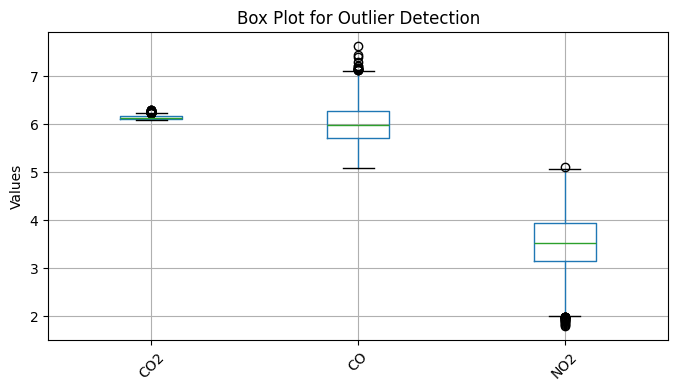

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['CO2', 'CO', 'NO2']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

Penjelasan:
- Melakukan transformasi log untuk mengurangi skewness data (pencilan).
- Visualisasi distribusi data dengan boxplot.

In [202]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

Penjelasan: Untuk kolom angka, mengisi nilai kosong dengan median dari masing-masing kolom.

 # Feature Transformation

In [203]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
AQI     1.118931
CO2     3.354856
PM10    1.660791
SO2     1.462526
dtype: float64


Penjelasan:Fitur yang memiliki distribusi tidak normal (skewness tinggi) ditransformasikan dengan log.

In [204]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['AQI','CO2', 'PM10','NO2']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])


Penjelasan:Fitur yang memiliki distribusi tidak normal (skewness tinggi) ditransformasikan dengan log.

#Convert categorical features to numerical values

In [205]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['CO'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)

Penjelasan:

- Fitur kategorikal (seperti Date) diubah menjadi nilai numerik berdasarkan urutan rata-rata CO.
- Ini disebut Target Encoding.

In [206]:
df.CO.unique()

array([5.44673737, 5.49716823, 5.56452041, 5.6454469 , 5.75890177,
       5.87211779, 5.92958914, 5.90536185, 5.83188248, 5.71042702,
       5.66642669, 5.53338949, 5.52545294, 5.51342875, 5.46383181,
       5.42495002, 5.39362755, 5.38907173, 5.40267738, 5.40717177,
       5.4161004 , 5.44241771, 5.47227067, 5.50938834, 5.54126355,
       5.56068163, 5.57972983, 5.58724866, 5.58349631, 5.5759491 ,
       5.57215403, 5.49306144, 5.48893773, 5.50533154, 5.53733427,
       5.50125821, 5.73979291, 5.70711026, 5.66296048, 5.63835467,
       5.65948222, 5.70044357, 5.71373281, 5.66988092, 5.59098698,
       5.52942909, 5.48063892, 5.5174529 , 5.33271879, 5.30330491,
       5.29330482, 5.29831737, 5.31320598, 5.31811999, 5.35658627,
       5.41164605, 5.43807931, 5.420535  , 5.37989735, 5.34233425,
       5.33753808, 5.36597602, 5.34710753, 5.32300998, 5.25227343,
       5.19849703, 5.16478597, 5.1590553 , 5.18178355, 5.19295685,
       5.20400669, 5.45103845, 5.55295958, 5.78074352, 6.01615

#Data Visualization

#Convert Correlation Heatmap of Numeric Features

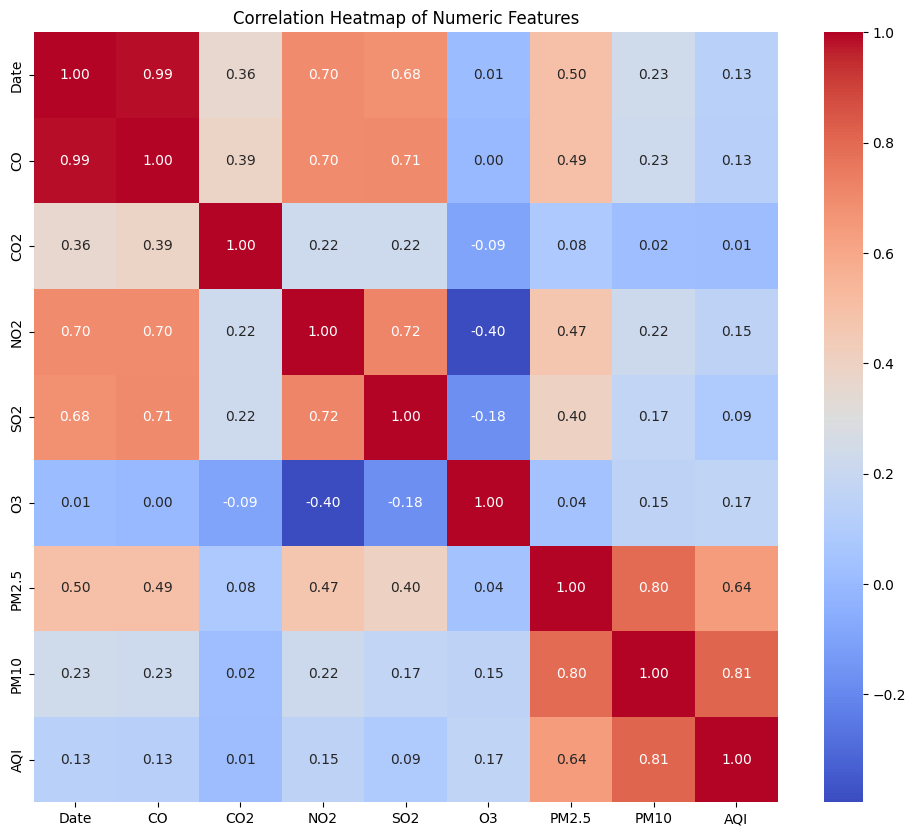

In [207]:
# Select numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Only create the heatmap if there are four or more numeric features
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric features to display a correlation heatmap.')

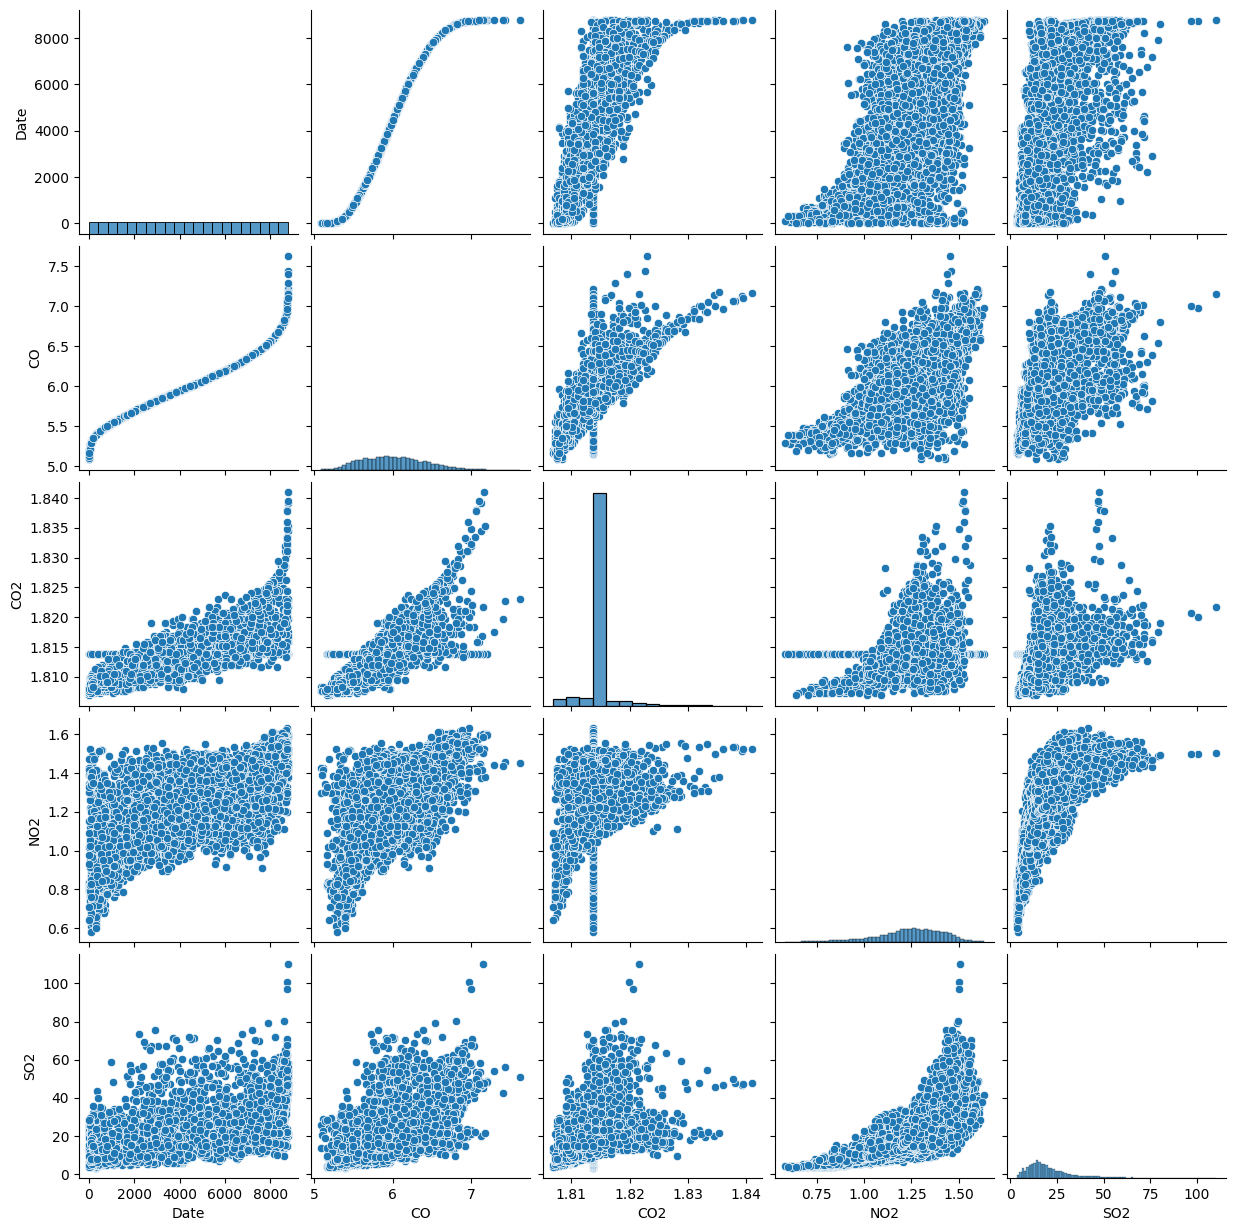

In [208]:
# Pair Plot for selected features (a dry but useful method to spot trends)
sample_features = numeric_df.columns.tolist()[:5]  # limiting to first 5 for practicality
sns.pairplot(df[sample_features])
plt.show()


In [209]:
df.CO.unique()

array([5.44673737, 5.49716823, 5.56452041, 5.6454469 , 5.75890177,
       5.87211779, 5.92958914, 5.90536185, 5.83188248, 5.71042702,
       5.66642669, 5.53338949, 5.52545294, 5.51342875, 5.46383181,
       5.42495002, 5.39362755, 5.38907173, 5.40267738, 5.40717177,
       5.4161004 , 5.44241771, 5.47227067, 5.50938834, 5.54126355,
       5.56068163, 5.57972983, 5.58724866, 5.58349631, 5.5759491 ,
       5.57215403, 5.49306144, 5.48893773, 5.50533154, 5.53733427,
       5.50125821, 5.73979291, 5.70711026, 5.66296048, 5.63835467,
       5.65948222, 5.70044357, 5.71373281, 5.66988092, 5.59098698,
       5.52942909, 5.48063892, 5.5174529 , 5.33271879, 5.30330491,
       5.29330482, 5.29831737, 5.31320598, 5.31811999, 5.35658627,
       5.41164605, 5.43807931, 5.420535  , 5.37989735, 5.34233425,
       5.33753808, 5.36597602, 5.34710753, 5.32300998, 5.25227343,
       5.19849703, 5.16478597, 5.1590553 , 5.18178355, 5.19295685,
       5.20400669, 5.45103845, 5.55295958, 5.78074352, 6.01615

#Data Visualization

#Unvariate Analysis

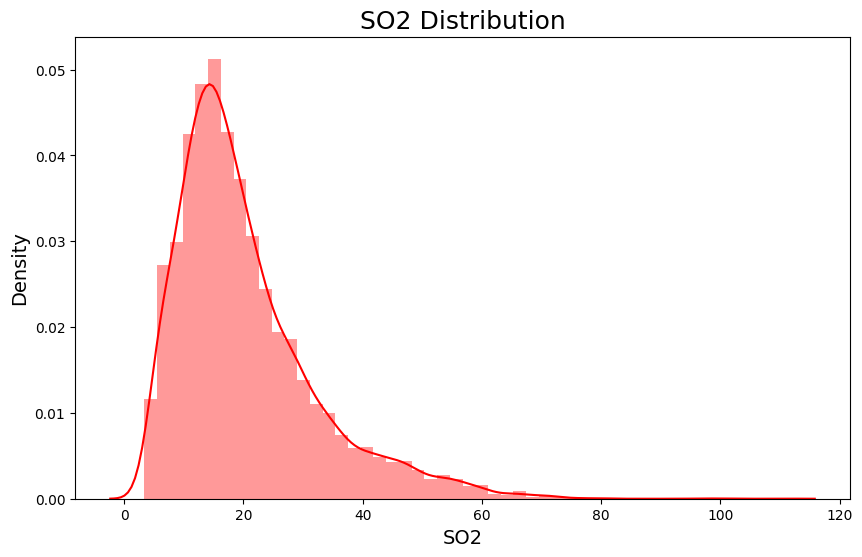

In [210]:
plt.figure(figsize=(10,6))
sns.distplot(df.SO2,color='r')
plt.title('SO2 Distribution',size=18)
plt.xlabel('SO2',size=14)
plt.ylabel('Density',size=14)
plt.show()

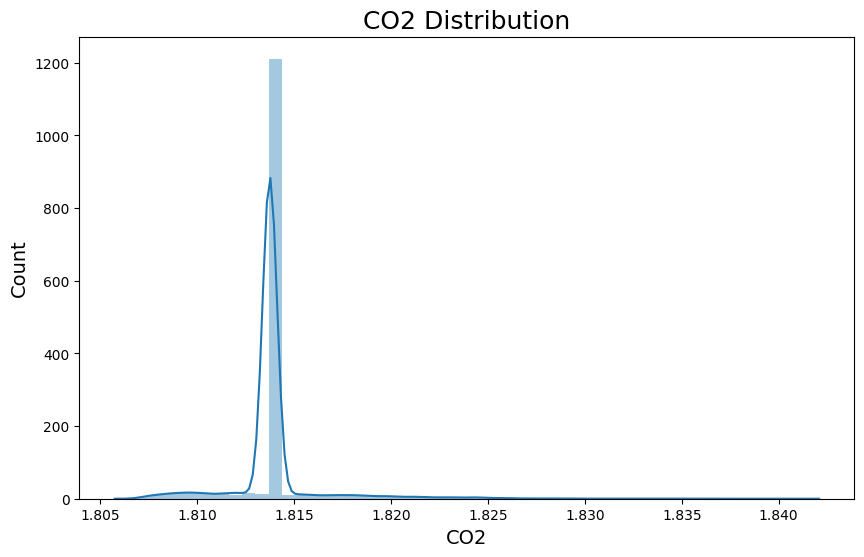

In [211]:
plt.figure(figsize=(10,6))
sns.distplot(df['CO2'])
plt.title('CO2 Distribution',size=18)
plt.xlabel('CO2',size=14)
plt.ylabel('Count',size=14)
plt.show()

#Univariate Analysis for Categorical Features

NO2

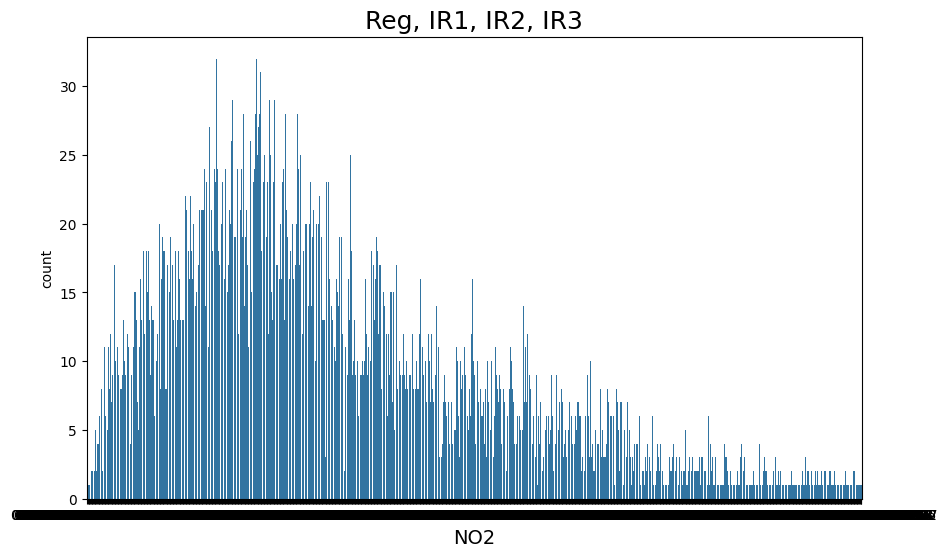

In [212]:
plt.figure(figsize=(10,6))
sns.countplot(x='NO2',data=df)
plt.title('Reg, IR1, IR2, IR3', size=18)
plt.xlabel('NO2',size=14)
plt.show()

O3

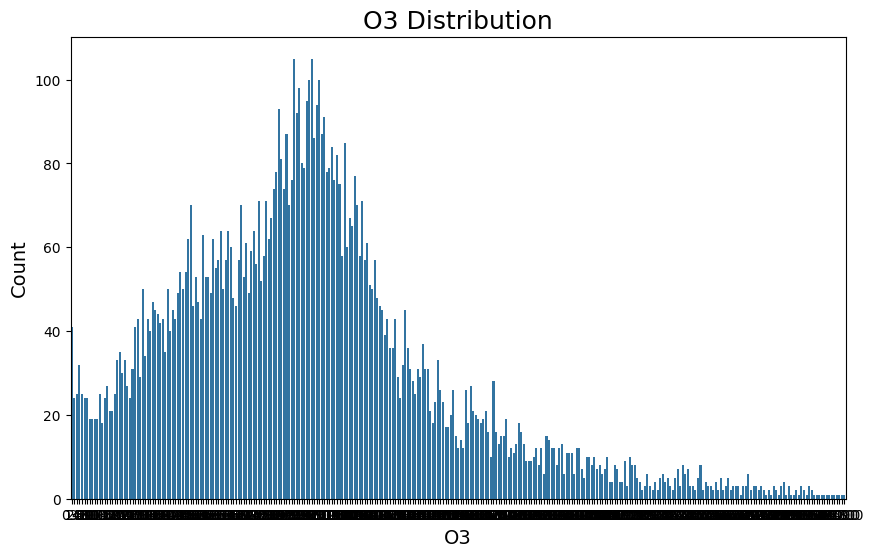

In [213]:
plt.figure(figsize=(10,6))
sns.countplot(x='O3',data=df)
plt.title('O3 Distribution',size=18)
plt.xlabel('O3',size=14)
plt.ylabel('Count',size=14)
plt.show()

AQI

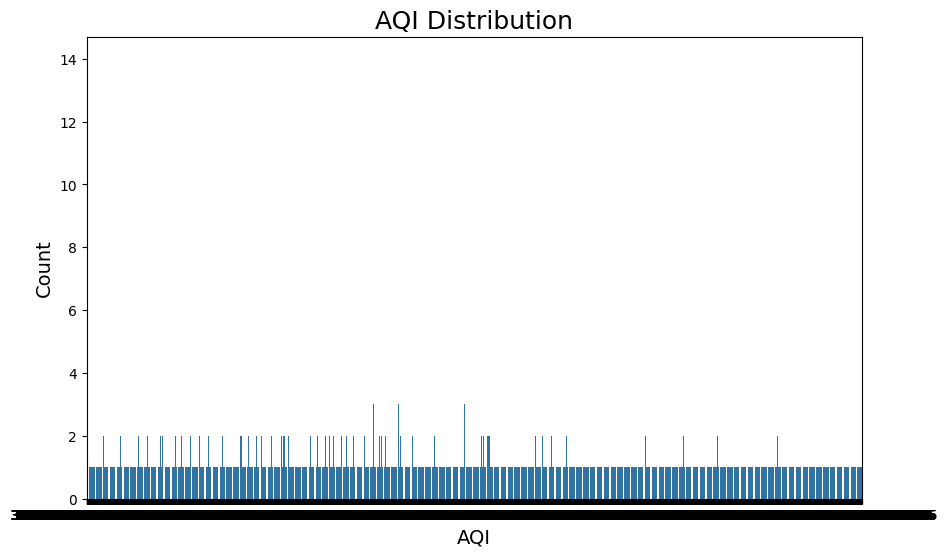

In [214]:
plt.figure(figsize=(10,6))
sns.countplot(x='AQI',data=df)
plt.title('AQI Distribution',size=18)
plt.xlabel('AQI',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [215]:
df.AQI.value_counts()

,count
AQI,
3.637586,14
3.705409,10
3.828641,10
3.753418,10
3.814043,10
...,...
4.623517,1
4.587549,1
4.571251,1


PM10

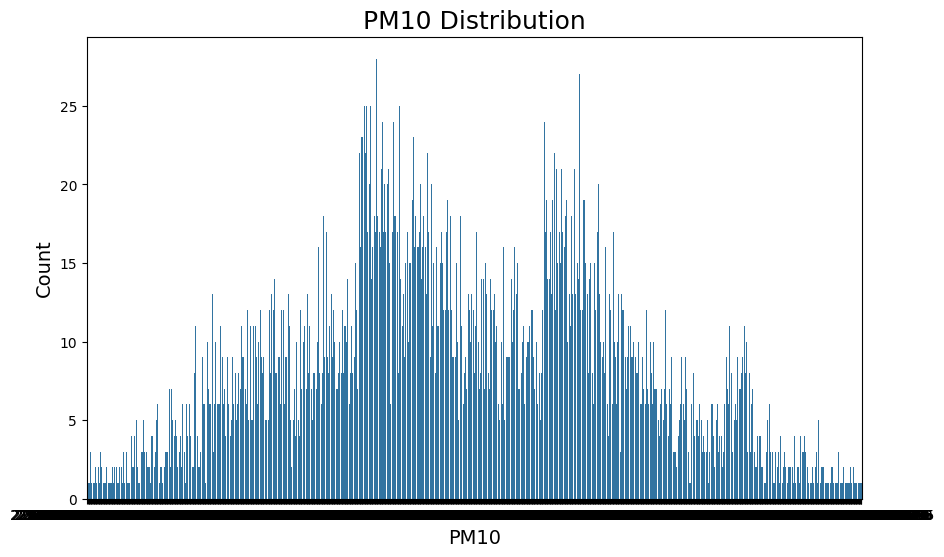

In [216]:
plt.figure(figsize=(10,6))
sns.countplot(x='PM10',data=df)
plt.title('PM10 Distribution',size=18)
plt.xlabel('PM10',size=14)
plt.ylabel('Count',size=14)
plt.show()

Bivariate Analysis

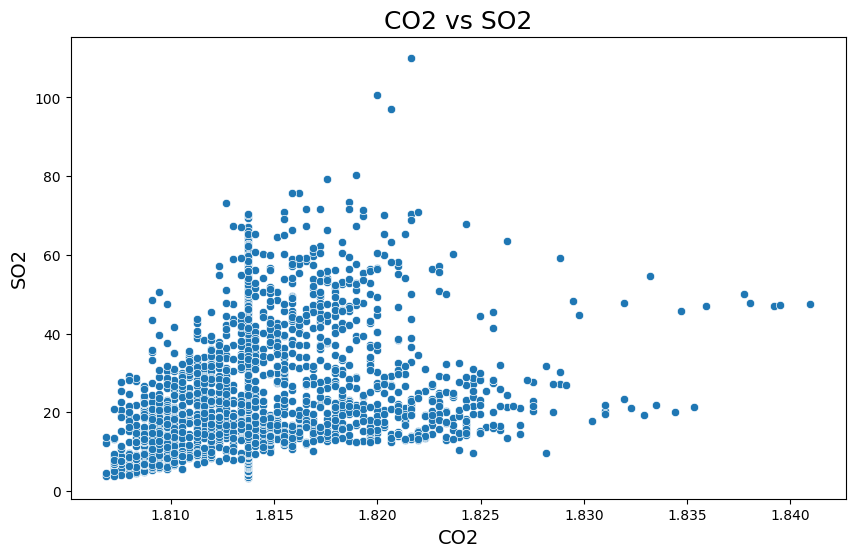

In [217]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CO2',y='SO2',data=df)
plt.title('CO2 vs SO2',size=18)
plt.xlabel('CO2',size=14)
plt.ylabel('SO2',size=14)
plt.show()

Text(0.5, 1.0, 'PM10 vs SO2')

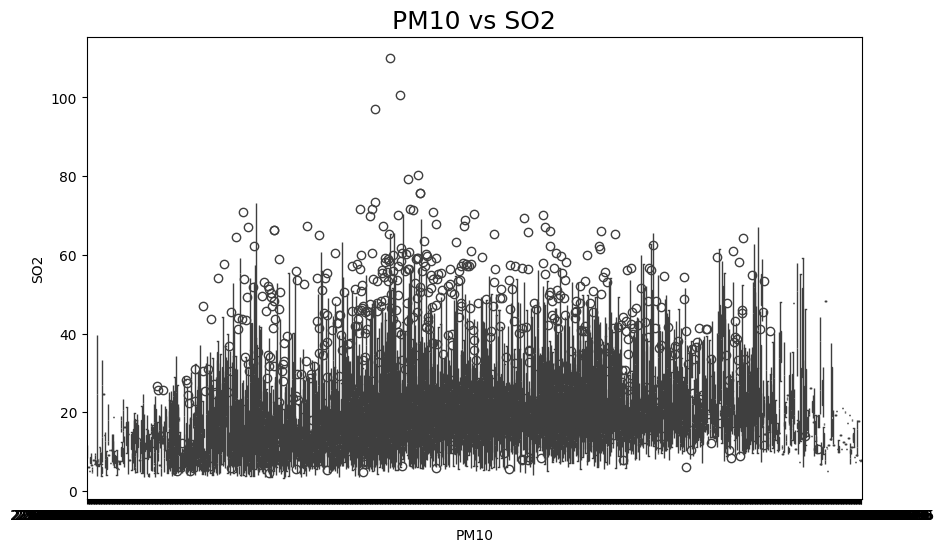

In [218]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PM10',y= 'SO2',data=df)
plt.title('PM10 vs SO2',size=18)

#Multivariate Analysis

#Handling categorical missing values


In [219]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

#Handling numeric missing values

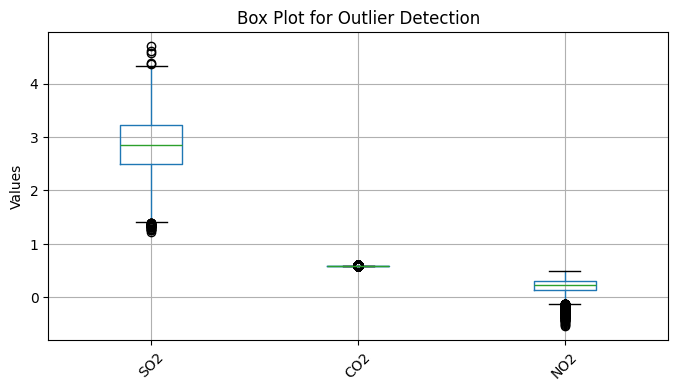

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['SO2', 'CO2', 'NO2']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [221]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

#Feature Transformation

#Feature Engineering

In [222]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
CO2    3.273456
NO2   -1.145791
dtype: float64


In [223]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['AQI', 'CO', 'CO2', 'NO2', 'PM10', 'SO2']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])

#Convert categorical features to numerical values

In [224]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['AQI'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)

In [225]:
encoding_maps = {}

for col in categorical_columns:
    labels_ordered = df.groupby([col])['AQI'].mean().sort_values().index
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}
    df[col] = df[col].map(labels_ordered)
    encoding_maps[col] = labels_ordered  # Simpan hasil encoding tiap kolom

# Tampilkan encoding map untuk semua kolom
for col, mapping in encoding_maps.items():
    print(f"Encoding for {col}:")
    print(mapping)
    print()

#Splitting the dataset into the training set and test set

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling

In [227]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Modelling

#Training the Random Forest Classification model on the training set

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [229]:
# Load dan preprocessing awal
df = pd.read_csv('Dubai_Air_Quality.csv')

In [230]:
# 1. Mengisi nilai kosong pada kolom numerik dengan median
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [231]:
# 2. Encoding kolom kategorikal 'Date'
df['Date'] = df['Date'].astype('category').cat.codes

In [232]:
# 3. Transformasi log untuk fitur skewed
for col in ['AQI', 'CO2', 'PM10', 'NO2']:
    df[col] = np.log(df[col])

In [233]:
# 4. Menentukan fitur dan label
features = ['Date', 'CO2', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
X = df[features]

In [234]:
# Klasifikasi AQI ke dalam 3 kelas
df['AQI_Class'] = pd.cut(df['AQI'], bins=[0, 3.5, 4.0, df['AQI'].max()], labels=[0, 1, 2])  # 0=Rendah, 1=Sedang, 2=Tinggi
y = df['AQI_Class'].astype('int')  # konversi label menjadi integer

In [235]:
# 5. Split data train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [236]:
# 6. Inisialisasi dan pelatihan model Random Forest
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

#Evaluasi Performance

#Predicting The Test Set Results

In [237]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluasi model menggunakan data uji
y_pred = classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.72      0.80       116
           2       0.98      0.99      0.99      1640

    accuracy                           0.98      1757
   macro avg       0.63      0.57      0.60      1757
weighted avg       0.97      0.98      0.97      1757

Confusion Matrix:
[[   0    0    1]
 [   0   83   33]
 [   0    9 1631]]
Accuracy Score:
0.9755264655663062


In [238]:
import joblib

# Simpan model ke file
joblib.dump(classifier, 'random_forest_model.pkl')
print("Model berhasil disimpan sebagai 'random_forest_model.pkl'")

Model berhasil disimpan sebagai 'random_forest_model.pkl'


#Inference model dengan data baru

In [239]:
# Contoh data baru (harus disesuaikan dan log-transformed seperti data training)
data_baru = pd.DataFrame([{
    'Date': '2024-01-10 15:00:00+00:00',
    'CO2': 450.0,
    'CO': 240.0,
    'NO2': 19.0,
    'SO2': 9.5,
    'O3': 80.0,
    'PM2.5': 25.0,
    'PM10': 65.0
}])

In [240]:
# Encode 'Date'
data_baru['Date'] = pd.Series(data_baru['Date']).astype('category').cat.codes

In [241]:
# Log transform fitur seperti pada training
for col in ['CO2', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']:
    data_baru[col] = np.log(data_baru[col])

In [242]:
# Susun kolom sesuai urutan training
data_baru = data_baru[['Date', 'CO2', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']]

In [243]:
# Load model dan prediksi
model = joblib.load('random_forest_model.pkl')
hasil_prediksi = model.predict(data_baru)

In [244]:
#Tampilkan hasil
print("Hasil Prediksi AQI Class:", hasil_prediksi[0])  # 0 = rendah, 1 = sedang, 2 = tinggi

Hasil Prediksi AQI Class: 2


#Feature Importance

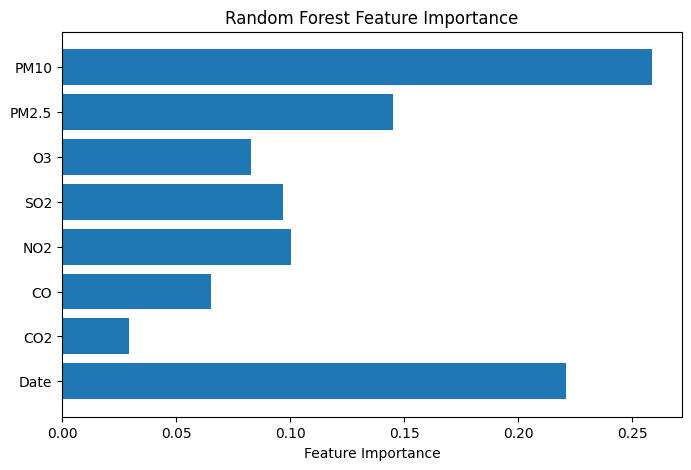

In [245]:
import matplotlib.pyplot as plt

# Tampilkan pentingnya setiap fitur
importances = classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Penjelasan:
- Feature importance menunjukkan seberapa besar pengaruh masing-masing fitur dalam dataset terhadap prediksi model.
- Ini artinya PM10, NO2, dan PM2.5 paling berpengaruh dalam menentukan kualitas udara menurut model.